### NOTE: 
This notebook contains exploration of the weather anomaly period in the beginning two weeks of February 2021.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (20,12)

In [3]:
blue = '#30a2da'
red = '#fc4f30'

In [4]:
weather = pd.read_csv('../data/weather_features.csv', index_col='Datetime', parse_dates=['Datetime'])
weather = weather[['airtemp_c', 'sunshine_mins']]
weather.head()

,airtemp_c,sunshine_mins
Datetime,,
2019-01-01 00:00:00,7.850000,0.0
2019-01-01 01:00:00,7.883333,0.0
2019-01-01 02:00:00,7.850000,0.0
2019-01-01 03:00:00,7.983333,0.0
2019-01-01 04:00:00,8.166667,0.0


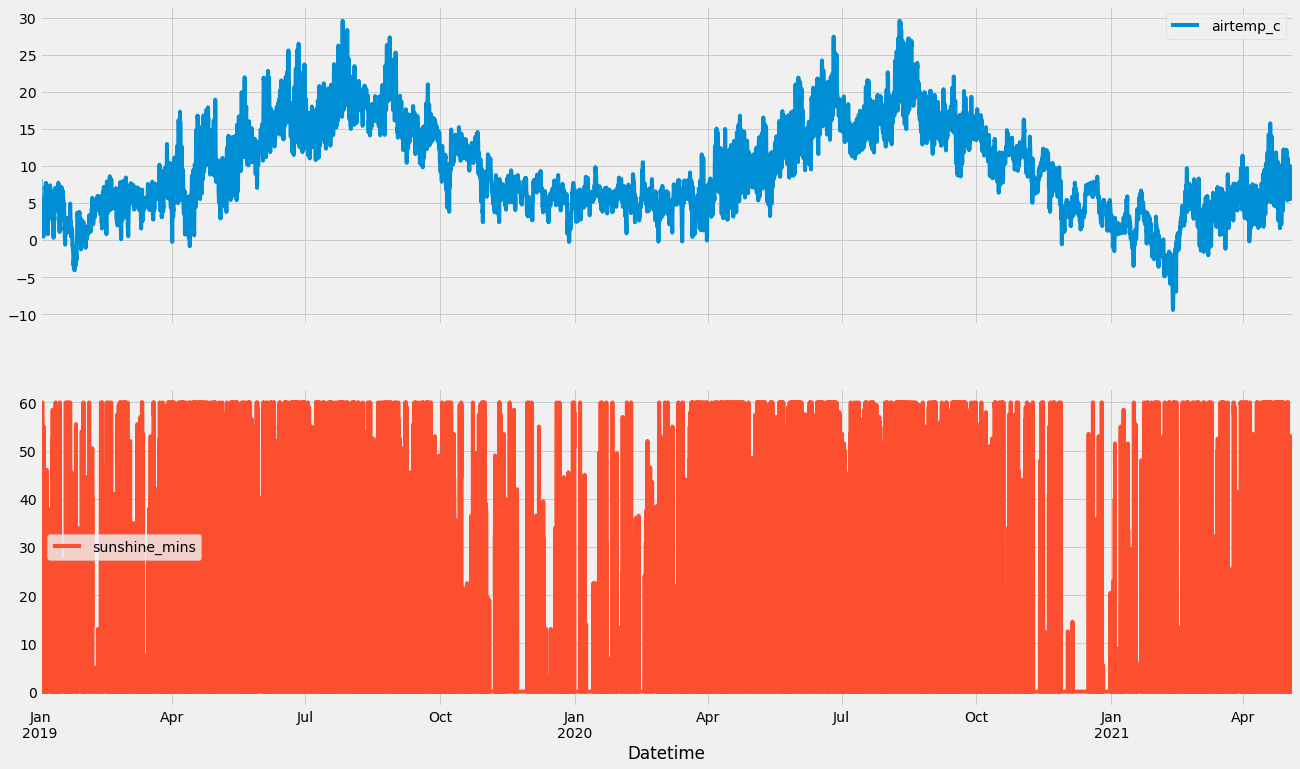

In [4]:
weather.plot(subplots=True)
plt.show()

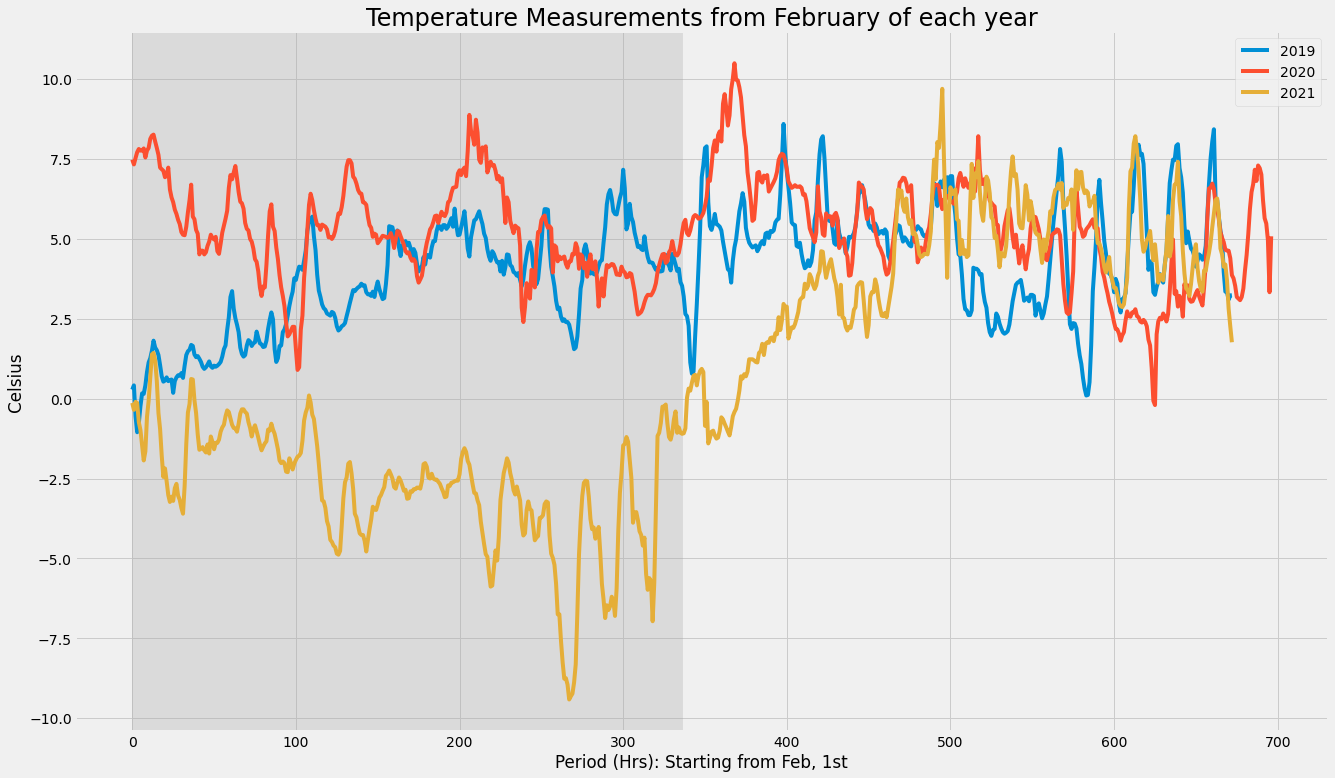

In [33]:
# Extraordinary cold period
# Interesting because it has not been this cold in previously
plt.plot(weather[['airtemp_c']].loc[dt.date(2019, 2, 1):dt.date(2019, 3, 1)].values, label='2019')
plt.plot(weather[['airtemp_c']].loc[dt.date(2020, 2, 1):dt.date(2020, 3, 1)].values, label='2020')
plt.plot(weather[['airtemp_c']].loc[dt.date(2021, 2, 1):dt.date(2021, 3, 1)].values, label='2021')
plt.legend()
plt.title('Temperature Measurements from February of each year', fontsize=24)
plt.ylabel('Celsius')
plt.xlabel('Period (Hrs): Starting from Feb, 1st')
plt.axvspan(0, 336, color='darkgrey', alpha=.3)
plt.savefig('visuals/temp_cold_period_february.png', bbox_inches='tight')
plt.show()

In [23]:
sum_sunshine_21 = weather[['sunshine_mins']].loc[dt.date(2021, 2, 1):dt.date(2021, 2, 16)].sum()
sum_sunshine_20 = weather[['sunshine_mins']].loc[dt.date(2020, 2, 1):dt.date(2020, 2, 16)].sum()
sum_sunshine_19 = weather[['sunshine_mins']].loc[dt.date(2019, 2, 1):dt.date(2019, 2, 16)].sum()

In [24]:
print(sum_sunshine_19[0], sum_sunshine_20[0], sum_sunshine_21[0])

1992.0 1053.0 3994.5


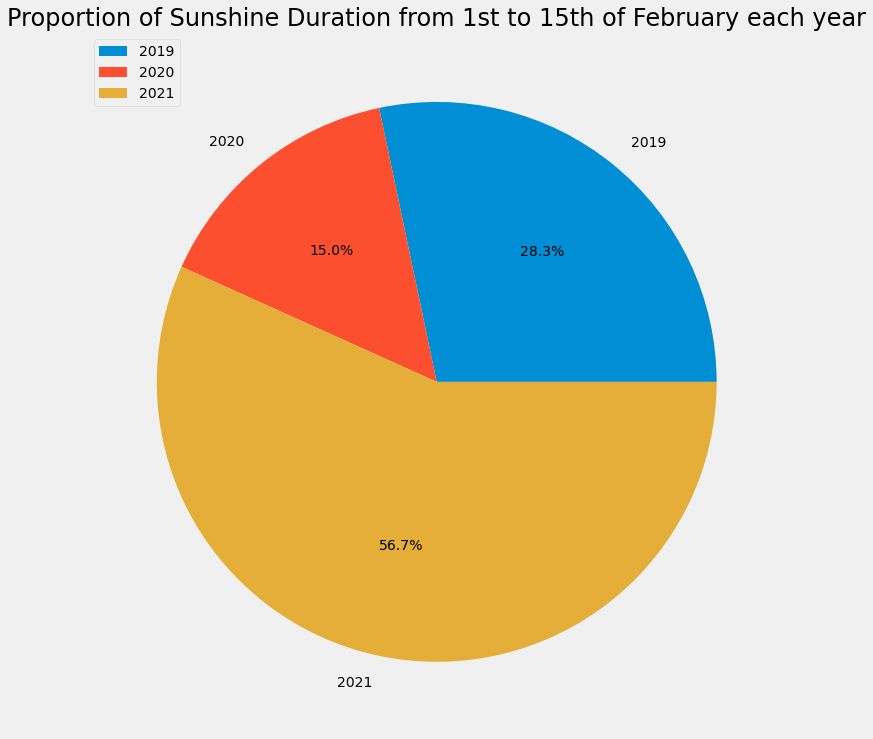

In [32]:
plt.pie([sum_sunshine_19[0], sum_sunshine_20[0], sum_sunshine_21[0]], labels=['2019', '2020', '2021'], autopct='%1.1f%%')
plt.legend()
plt.title('Proportion of Sunshine Duration from 1st to 15th of February each year', fontsize=24)
plt.savefig('visuals/sunshine_cold_period_february.png', bbox_inches='tight')
plt.show()

<AxesSubplot:xlabel='Datetime'>

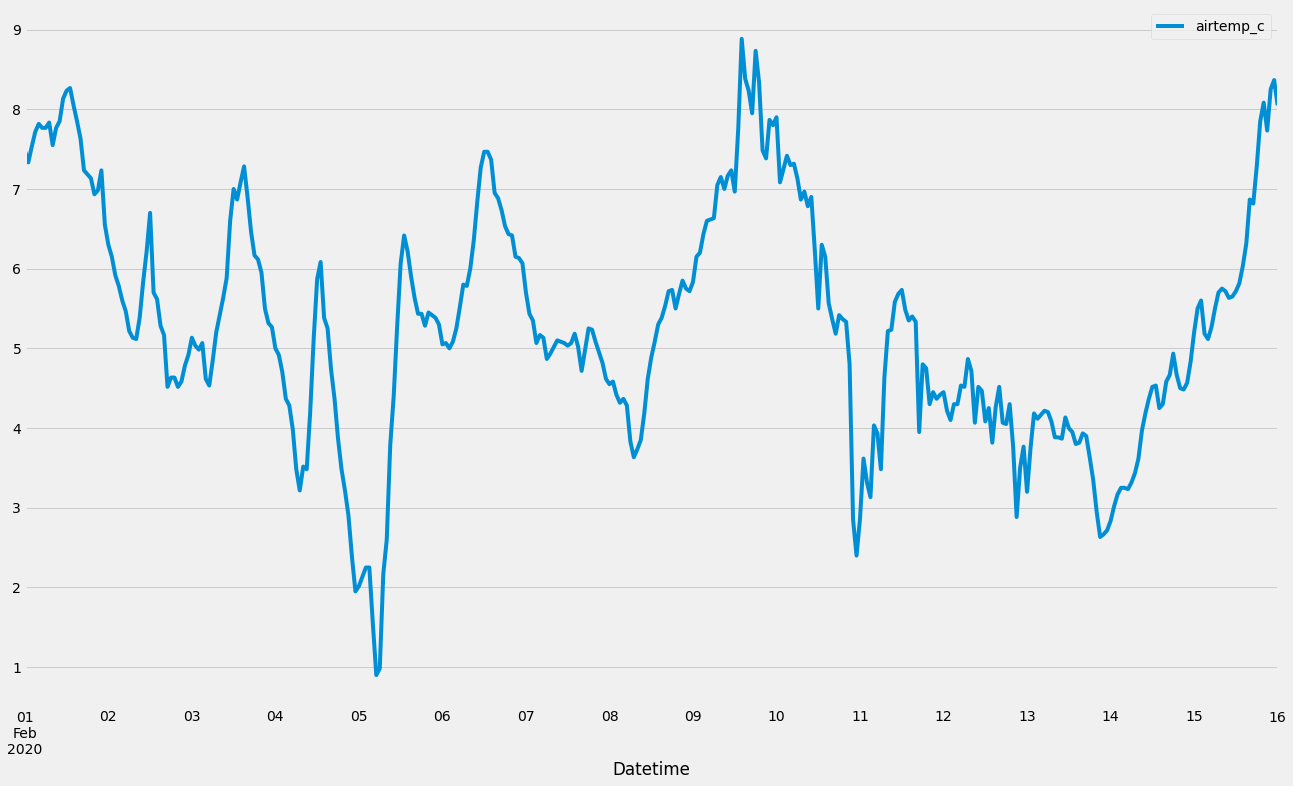

In [15]:
weather[['airtemp_c']].loc[dt.date(2020, 2, 1):dt.date(2020, 2, 16)].plot()

In [15]:
weather[['airtemp_c']].describe()

,airtemp_c
count,20520.000000
mean,9.455829
std,6.035450
min,-9.416667
25%,5.000000
50%,8.033333
75%,14.166667
max,29.566667


In [5]:
kld = pd.read_csv(f'../data/processed/kolding_features.csv', index_col='Datetime', parse_dates=['Datetime'])
kld = kld[['Value', 'sunshine_mins', 'airtemp_c', 'daylength_hrs', 'wkdy_sin', 'wkdy_cos', 'wknd', 'mnth_sin', 'mnth_cos']]
stb = pd.read_csv(f'../data/processed/strib_features.csv', index_col='Datetime', parse_dates=['Datetime'])
stb = stb[['Value', 'sunshine_mins', 'airtemp_c', 'daylength_hrs', 'wkdy_sin', 'wkdy_cos', 'wknd', 'mnth_sin', 'mnth_cos']]

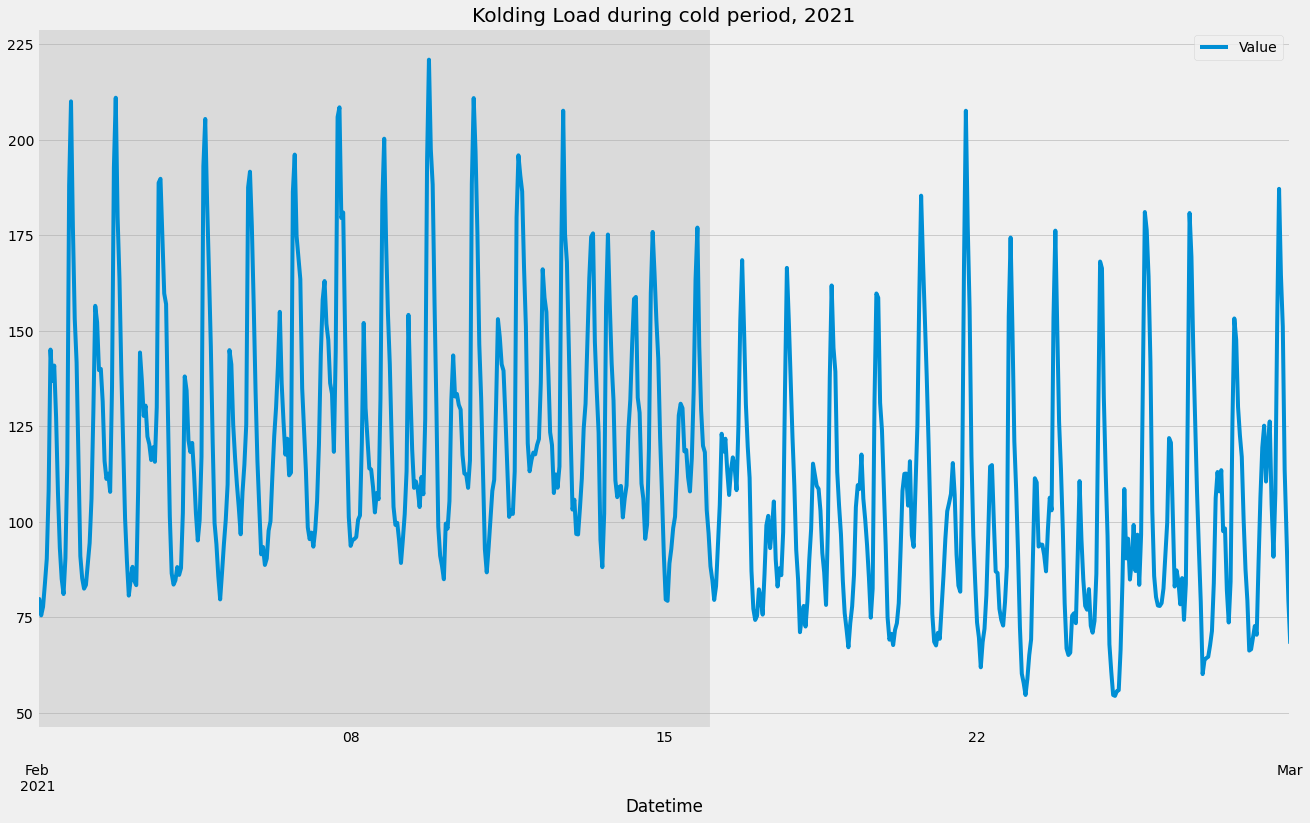

In [8]:
ax = kld[['Value']].loc[dt.date(2021, 2, 1):dt.date(2021, 3, 1)].plot()
ax.axvspan(dt.date(2021, 2, 1), dt.date(2021, 2, 16), color='darkgrey', alpha=.3)
plt.title('Kolding Load during cold period, 2021')
plt.show()

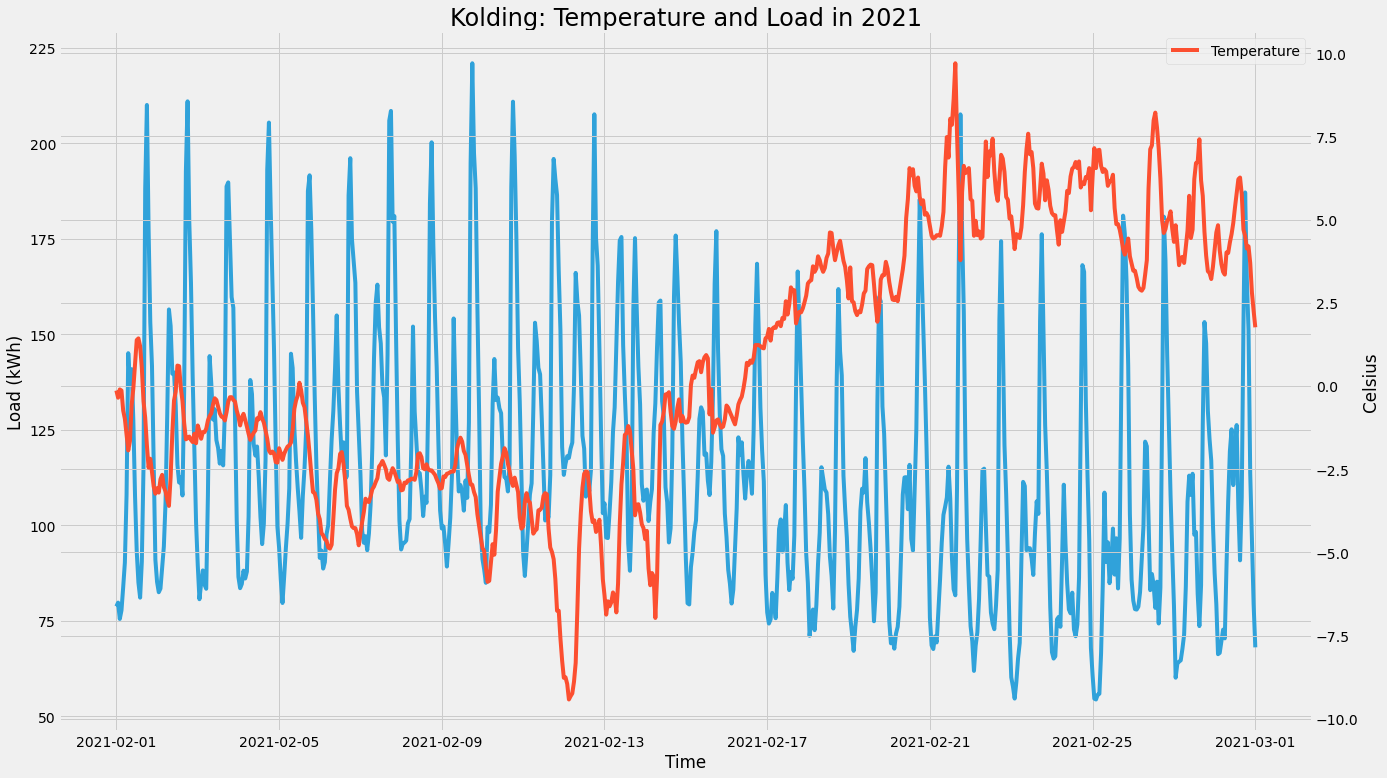

In [20]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(kld[['Value']].loc[dt.date(2021, 2, 1):dt.date(2021, 3, 1)], color=blue, label='Load')
ax2.plot(weather[['airtemp_c']].loc[dt.date(2021, 2, 1):dt.date(2021, 3, 1)], color=red, label='Temperature')

ax1.set_xlabel('Time')
ax1.set_ylabel('Load (kWh)')
ax2.set_ylabel('Celsius')

ax1.set_title('Kolding: Temperature and Load in 2021', fontsize=24)
plt.legend()
plt.show()


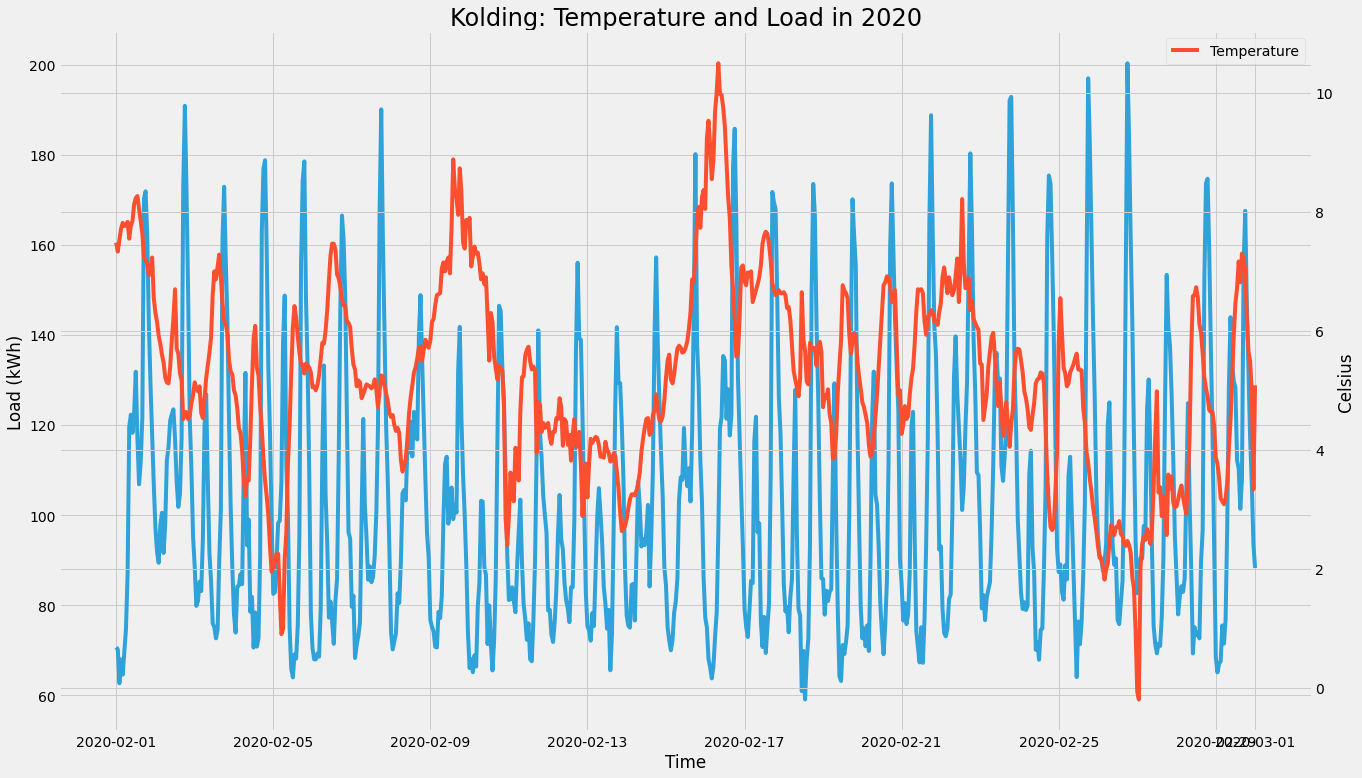

In [19]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(kld[['Value']].loc[dt.date(2020, 2, 1):dt.date(2020, 3, 1)], color=blue, label='Load')
ax2.plot(weather[['airtemp_c']].loc[dt.date(2020, 2, 1):dt.date(2020, 3, 1)], color=red, label='Temperature')

ax1.set_xlabel('Time')
ax1.set_ylabel('Load (kWh)')
ax2.set_ylabel('Celsius')

ax1.set_title('Kolding: Temperature and Load in 2020', fontsize=24)
ax2.legend()
plt.show()

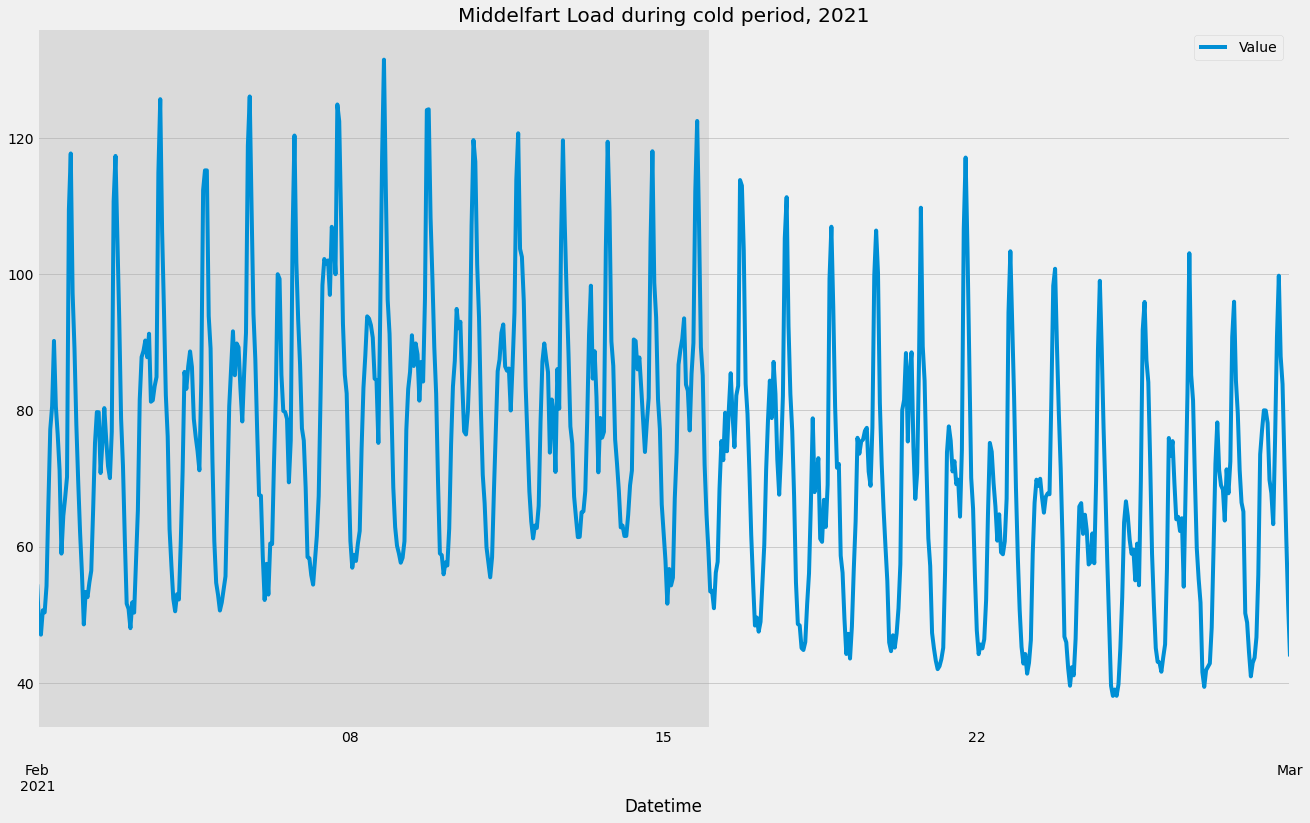

In [9]:
ax = stb[['Value']].loc[dt.date(2021, 2, 1):dt.date(2021, 3, 1)].plot()
ax.axvspan(dt.date(2021, 2, 1), dt.date(2021, 2, 16), color='darkgrey', alpha=.3)
plt.title('Middelfart Load during cold period, 2021')
plt.show()

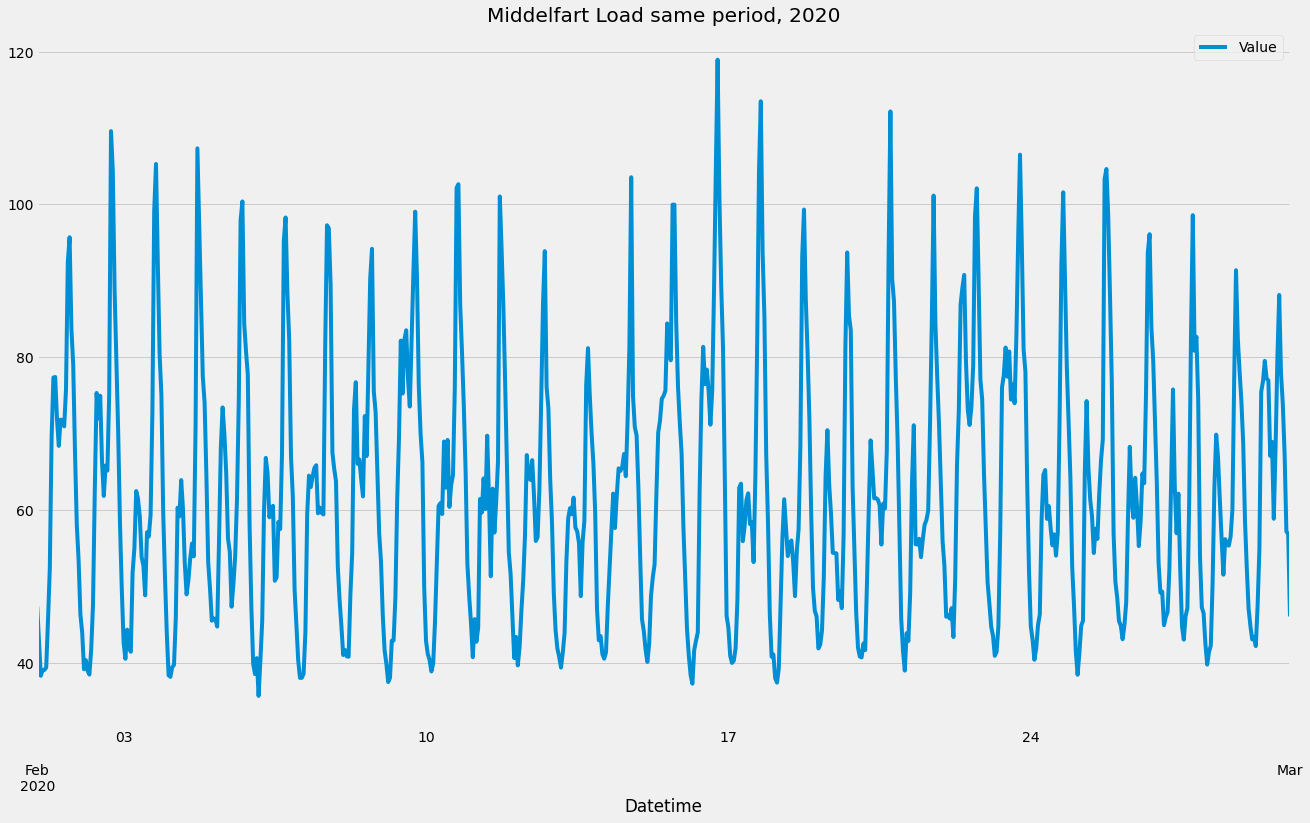

In [10]:
ax = stb[['Value']].loc[dt.date(2020, 2, 1):dt.date(2020, 3, 1)].plot()
plt.title('Middelfart Load same period, 2020')
plt.show()

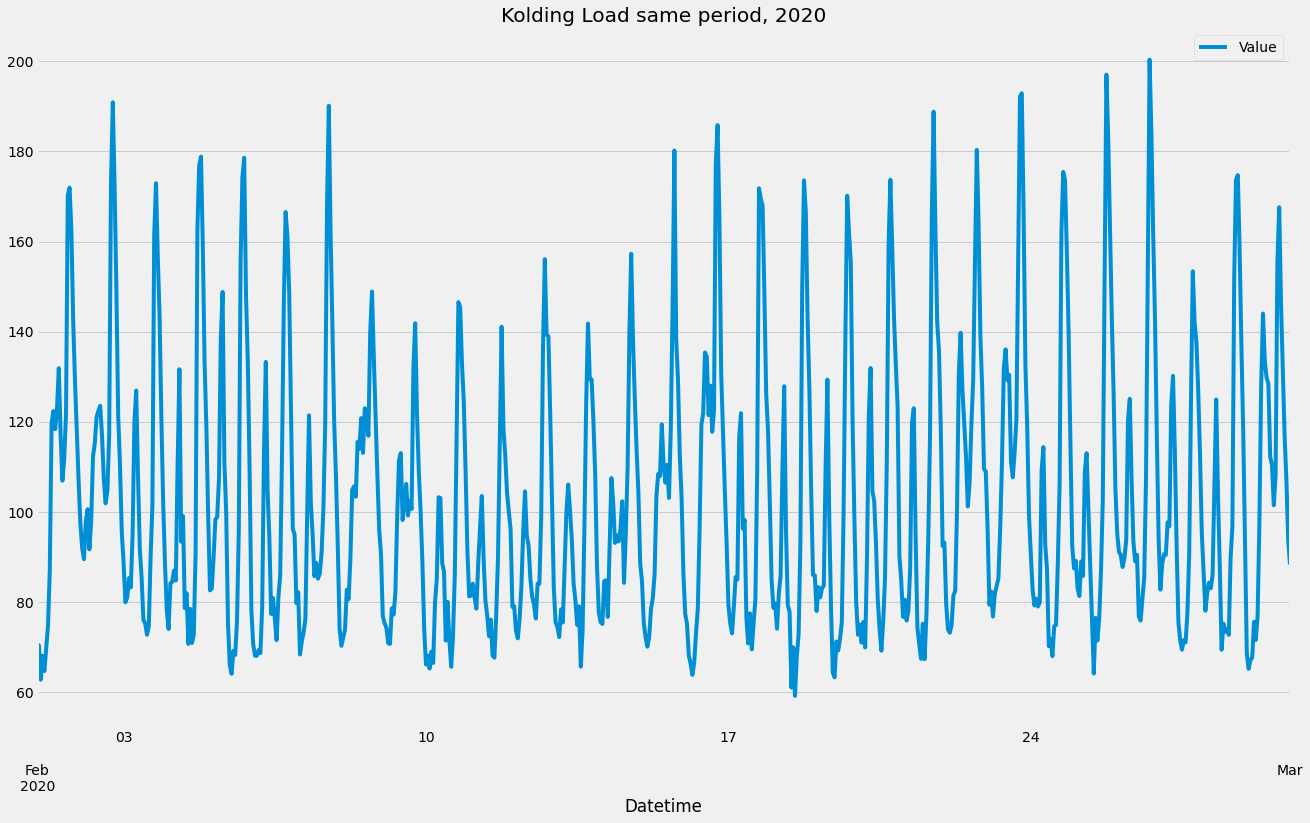

In [11]:
ax = kld[['Value']].loc[dt.date(2020, 2, 1):dt.date(2020, 3, 1)].plot()
plt.title('Kolding Load same period, 2020')
plt.show()